In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("csv_pca/psam_p06.csv")
df.head()

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2020GQ0000016,9,1,8103,4,6,1006149,15,94,...,15,29,14,1,2,1,15,15,15,1
1,P,2020GQ0000023,9,1,3100,4,6,1006149,33,45,...,34,34,33,57,33,7,59,32,59,57
2,P,2020GQ0000039,9,1,7310,4,6,1006149,79,28,...,78,76,6,74,154,82,5,7,74,80
3,P,2020GQ0000044,9,1,2901,4,6,1006149,135,33,...,135,135,31,134,31,134,136,131,236,237
4,P,2020GQ0000070,9,1,3100,4,6,1006149,25,44,...,45,25,26,45,44,25,44,43,25,5


In [13]:
len(df)

303788

In [14]:
len(np.unique(df.PUMA.values))

265

In [15]:
INCOME_COL = "PINCP"
AGE_COL = "AGEP"

In [16]:
df = df[df[INCOME_COL] != 0.0]

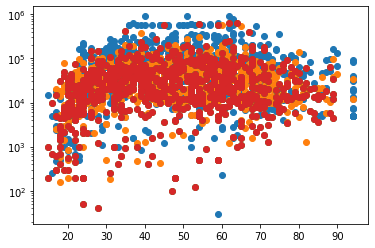

In [17]:
currdf = df[df["PUMA"] == 8103]
plt.scatter(currdf[AGE_COL], currdf[INCOME_COL])

currdf = df[df["PUMA"] == 3100]
plt.scatter(currdf[AGE_COL], currdf[INCOME_COL])

currdf = df[df["PUMA"] == 2901]
plt.scatter(currdf[AGE_COL], currdf[INCOME_COL])

currdf = df[df["PUMA"] == 2901]
plt.scatter(currdf[AGE_COL], currdf[INCOME_COL])

plt.yscale("log")

In [18]:
avg_incomes = []
avg_ages = []
std_incomes = []
std_ages = []

for puma in np.unique(df.PUMA.values):
    currdf = df[df["PUMA"] == puma]
    incomes = currdf[INCOME_COL].values
    avg_incomes.append(np.nanmean(incomes))
    std_incomes.append(np.nanstd(incomes))
    ages = currdf[AGE_COL].values
    avg_ages.append(np.nanmean(ages))
    std_ages.append(np.nanstd(ages))

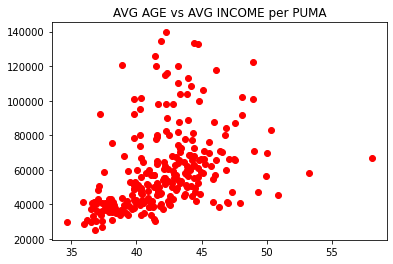

In [19]:
plt.scatter(avg_ages, avg_incomes, color="r")
plt.title("AVG AGE vs AVG INCOME per PUMA")
plt.show()

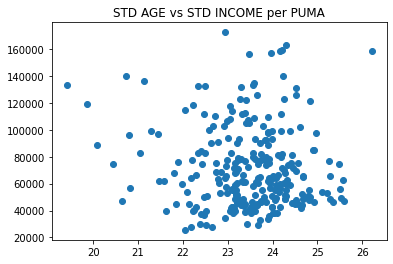

In [20]:
plt.scatter(std_ages, std_incomes)
plt.title("STD AGE vs STD INCOME per PUMA")
plt.show()

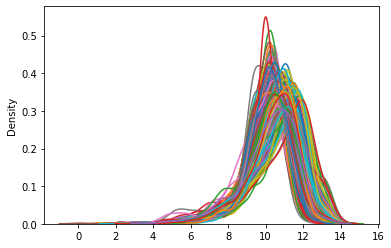

In [21]:
import seaborn as sns
fig = plt.figure()
ax = fig.add_subplot(111)

for puma in np.unique(df.PUMA.values):
    currdf = df[df["PUMA"] == puma]
    incomes = currdf[INCOME_COL].values
    sns.kdeplot(np.log(incomes[incomes > 0]), ax=ax, alpha=0.3)

In [22]:
import shapefile as shp

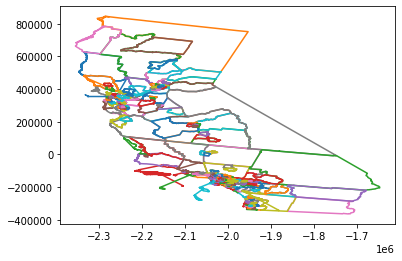

In [23]:
sf = shp.Reader("csv_pca/ipums_puma_2010/ipums_puma_2010.shp")

plt.figure()
kept = 0
ids = []

for shape in sf.shapeRecords():
    if shape.record[4] != "California":
        continue
    
    kept += 1
    ids.append(int(shape.record[5]))
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

In [24]:
tmp = sf.shapeRecords()[0]

In [25]:
tmp.record

Record #0: [600105, 'G06000105', '0600105', '06', 'California', '00105', 'Alameda County (West)--San Leandro, Alameda & Oakland (Southwest) Cities PUMA']

In [26]:
sorted(ids)

SyntaxError: invalid syntax (<ipython-input-26-866802f21882>, line 1)

In [27]:
np.unique(df.PUMA.values)

array([  101,   102,   103,   104,   105,   106,   107,   108,   109,
         110,   300,   701,   702,  1100,  1301,  1302,  1303,  1304,
        1305,  1306,  1307,  1308,  1309,  1500,  1700,  1901,  1902,
        1903,  1904,  1905,  1906,  1907,  2300,  2500,  2901,  2902,
        2903,  2904,  2905,  3100,  3300,  3701,  3702,  3703,  3704,
        3705,  3706,  3707,  3708,  3709,  3710,  3711,  3712,  3713,
        3714,  3715,  3716,  3717,  3718,  3719,  3720,  3721,  3722,
        3723,  3724,  3725,  3726,  3727,  3728,  3729,  3730,  3731,
        3732,  3733,  3734,  3735,  3736,  3737,  3738,  3739,  3740,
        3741,  3742,  3743,  3744,  3745,  3746,  3747,  3748,  3749,
        3750,  3751,  3752,  3753,  3754,  3755,  3756,  3757,  3758,
        3759,  3760,  3761,  3762,  3763,  3764,  3765,  3766,  3767,
        3768,  3769,  3900,  4101,  4102,  4701,  4702,  5301,  5302,
        5303,  5500,  5700,  5901,  5902,  5903,  5904,  5905,  5906,
        5907,  5908,

In [28]:
import geopandas as gpd

shp = gpd.read_file("csv_pca/ipums_puma_2010/ipums_puma_2010.shp")

In [29]:
shp = shp[shp["State"] == "California"]

In [30]:
shp

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry
0,600105,G06000105,0600105,06,California,00105,"Alameda County (West)--San Leandro, Alameda & ...","MULTIPOLYGON (((-2258646.530 342733.341, -2258..."
1,600102,G06000102,0600102,06,California,00102,Alameda County (Northwest)--Oakland (Northwest...,"POLYGON ((-2259099.372 353383.127, -2259101.40..."
2,608502,G06008502,0608502,06,California,08502,Santa Clara County (Northwest)--Sunnyvale & Sa...,"POLYGON ((-2246220.131 304622.390, -2246216.04..."
3,600108,G06000108,0600108,06,California,00108,"Alameda County (Southwest)--Union City, Newark...","MULTIPOLYGON (((-2247215.331 305414.315, -2247..."
4,600107,G06000107,0600107,06,California,00107,Alameda County (Central)--Hayward City PUMA,"POLYGON ((-2244205.948 331582.334, -2244209.13..."
...,...,...,...,...,...,...,...,...
2260,606507,G06006507,0606507,06,California,06507,"Riverside County (North Central)--San Jacinto,...","POLYGON ((-1915650.603 -178221.518, -1915635.8..."
2261,606502,G06006502,0606502,06,California,06502,"Riverside County (Central)--Cathedral City, Pa...","POLYGON ((-1882166.938 -182260.143, -1881917.7..."
2262,607101,G06007101,0607101,06,California,07101,San Bernardino County (Northeast)--Twentynine ...,"POLYGON ((-1880615.090 19362.790, -1879774.209..."
2263,607104,G06007104,0607104,06,California,07104,"San Bernardino County (Southwest)--Phelan, Lak...","POLYGON ((-1954149.236 -112607.342, -1954116.5..."


In [31]:
import geopandas as gpd

# open file
gdf = shp

# add NEIGHBORS column
gdf["NEIGHBORS"] = None  

for index, country in gdf.iterrows():   

    # get 'not disjoint' countries
    neighbors = gdf[~gdf.geometry.disjoint(country.geometry)].PUMA.tolist()

    # remove own name of the country from the list
    neighbors = [ name for name in neighbors if country.PUMA != name ]

    # add names of neighbors as NEIGHBORS value
    gdf.at[index, "NEIGHBORS"] = ", ".join(neighbors)


In [32]:
shp

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry,NEIGHBORS
0,600105,G06000105,0600105,06,California,00105,"Alameda County (West)--San Leandro, Alameda & ...","MULTIPOLYGON (((-2258646.530 342733.341, -2258...","00106, 00104, 00103, 07502"
1,600102,G06000102,0600102,06,California,00102,Alameda County (Northwest)--Oakland (Northwest...,"POLYGON ((-2259099.372 353383.127, -2259101.40...","00101, 00104, 00103"
2,608502,G06008502,0608502,06,California,08502,Santa Clara County (Northwest)--Sunnyvale & Sa...,"POLYGON ((-2246220.131 304622.390, -2246216.04...","00108, 08504, 08501, 08507, 08503"
3,600108,G06000108,0600108,06,California,00108,"Alameda County (Southwest)--Union City, Newark...","MULTIPOLYGON (((-2247215.331 305414.315, -2247...","08502, 00107, 08504, 00109"
4,600107,G06000107,0600107,06,California,00107,Alameda County (Central)--Hayward City PUMA,"POLYGON ((-2244205.948 331582.334, -2244209.13...","00108, 00110, 00109, 00106"
...,...,...,...,...,...,...,...,...,...
2260,606507,G06006507,0606507,06,California,06507,"Riverside County (North Central)--San Jacinto,...","POLYGON ((-1915650.603 -178221.518, -1915635.8...","06506, 06509, 06508, 07105, 07106, 06502, 0710..."
2261,606502,G06006502,0606502,06,California,06502,"Riverside County (Central)--Cathedral City, Pa...","POLYGON ((-1882166.938 -182260.143, -1881917.7...","06503, 06506, 06515, 06507, 07101"
2262,607101,G06007101,0607101,06,California,07101,San Bernardino County (Northeast)--Twentynine ...,"POLYGON ((-1880615.090 19362.790, -1879774.209...","02905, 07102, 07103, 03701, 00300, 06515, 0650..."
2263,607104,G06007104,0607104,06,California,07104,"San Bernardino County (Southwest)--Phelan, Lak...","POLYGON ((-1954149.236 -112607.342, -1954116.5...","07102, 07103, 07105, 07107, 07112, 07111, 0711..."


In [33]:
puma2id = {x: i for i, x in enumerate(np.unique(df.PUMA.values))}

In [34]:
np.random.seed(100)

income_data = []
for puma in np.unique(df.PUMA.values):
    currdf = df[df["PUMA"] == puma]
    inc = np.random.choice(currdf[INCOME_COL].values, 200)
    income_data.append(inc)

In [ ]:
import pickle

income_data = np.array(income_data)
with open("income_data/california_income_subsampled.pickle", "wb") as fp:
    pickle.dump(income_data, fp)

In [35]:
n = len(np.unique(df.PUMA.values))

neighbors = np.zeros((n, n))
for index, puma in shp.iterrows():  
    row = puma2id[int(puma.PUMA)]
    curr_neigh = [int(x) for x in puma.NEIGHBORS.split(", ")]
    for neigh in curr_neigh:
        col = puma2id[neigh]
        neighbors[row, col] += 1

In [ ]:
with open("income_data/california_puma_neighbors.pickle", "wb") as fp:
    pickle.dump(neighbors, fp)